In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def f(x): # functie trig deci ar trebui sa fie foarte precisa interpolarea
    return np.sin(x) ** 2 - np.cos(x) ** 2

def citeste_noduri_din_fisier(nume_fisier):
    with open(nume_fisier, 'r') as f:
        linie = f.readline()
        x0, xn = map(float, linie.strip().split())
    return x0, xn

def genereaza_noduri(n, x0, xn): # vrem sa fie echidistante ca sa functioneze ok
    return np.linspace(x0, xn, n)

def construieste_matrice_T(x_nodes):
    n = len(x_nodes) - 1
    m = n // 2
    
    T = np.zeros((n+1, n+1))
    
    for i in range(n+1):
        T[i, 0] = 1
        
        for k in range(1, m+1):
            T[i, 2*k-1] = np.sin(k * x_nodes[i])
            
            T[i, 2*k] = np.cos(k * x_nodes[i])
    
    return T

def calculeaza_coeficienti(T, y_nodes):
    return np.linalg.solve(T, y_nodes)

def Tn(x_val, coeficienti, m): # interpolantul trigonometric
    rezultat = coeficienti[0]
    
    for k in range(1, m+1):
        rezultat += coeficienti[2*k] * np.cos(k * x_val)
        rezultat += coeficienti[2*k-1] * np.sin(k * x_val)
    
    return rezultat

def Pm(x_bar, x_nodes, y_nodes): # clasic polinom interp Lagrange
    n = len(x_nodes)
    rezultat = 0.0
    for i in range(n):
        li = 1.0
        for j in range(n):
            if j != i:
                li *= (x_bar - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        rezultat += y_nodes[i] * li
    return rezultat


In [36]:
nume_fisier = 'noduri.txt'
x_bar = 1.0
n = 11

x0, xn = citeste_noduri_din_fisier('noduri.txt')
print(x0, xn)

0.5 5.5


In [38]:
x_nodes = genereaza_noduri(n, x0, xn)
y_nodes = f(x_nodes)

T = construieste_matrice_T(x_nodes)
m = (len(x_nodes) - 1) // 2
coeficienti = calculeaza_coeficienti(T, y_nodes)

approx_Tn = Tn(x_bar, coeficienti, m)
approx_Pm = Pm(x_bar, x_nodes, y_nodes)
exact = f(x_bar)

print(f"Tn({x_bar}) = {approx_Tn}")
print(f"Pm({x_bar}) = {approx_Pm}")
print(f"f({x_bar}) = {exact}")
print(f"Eroare Tn = {abs(approx_Tn - exact)}")
print(f"Eroare Pm = {abs(approx_Pm - exact)}")

X = np.linspace(x0, xn, 1000)
F_vals = f(X)
Tn_vals = np.array([Tn(xi, coeficienti, m) for xi in X])
Pm_vals = np.array([Pm(xi, x_nodes, y_nodes) for xi in X])

Tn(1.0) = 0.4161468365471425
Pm(1.0) = 0.4161468365471423
f(1.0) = 0.4161468365471423
Eroare Tn = 2.220446049250313e-16
Eroare Pm = 0.0


### Bonus

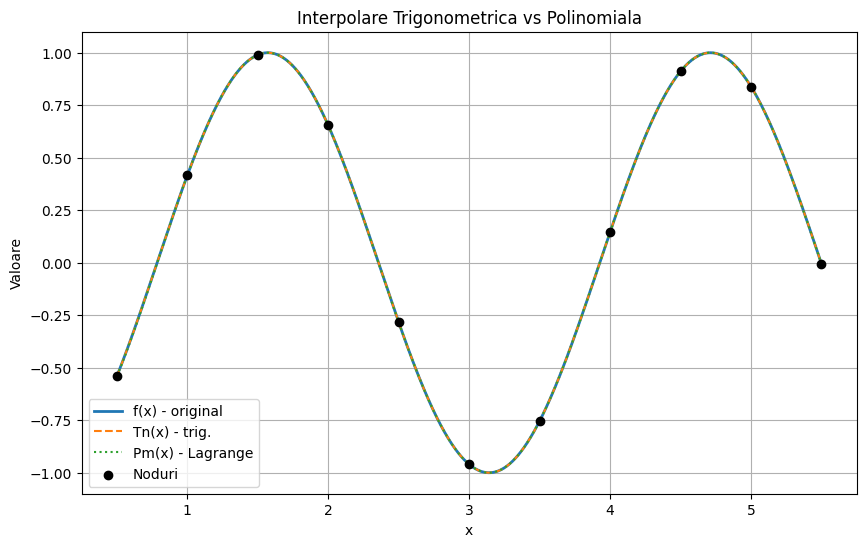

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(X, F_vals, label="f(x) - original", linewidth=2)
plt.plot(X, Tn_vals, label="Tn(x) - trig.", linestyle='--')
plt.plot(X, Pm_vals, label="Pm(x) - Lagrange", linestyle=':')
plt.scatter(x_nodes, y_nodes, color='black', label='Noduri', zorder=5)
plt.title("Interpolare Trigonometrica vs Polinomiala")
plt.xlabel("x")
plt.ylabel("Valoare")
plt.legend()
plt.grid(True)
plt.show()

### Alta incercare de rezolvare
- Folosind FFT pentru a obtine coeficientii, fara a rezolva explicit sistemul TX=Y
- Presupune ca nodurile sunt echidistante si pe un interval periodic 

In [27]:
def f(x): # functie trig deci ar trebui sa fie foarte precisa interpolarea
    return np.sin(x) ** 2 - np.cos(x) ** 2

def citeste_noduri_din_fisier(nume_fisier):
    with open(nume_fisier, 'r') as f:
        linie = f.readline()
        x0, xn = map(float, linie.strip().split())
    return x0, xn

def genereaza_noduri(n, x0, xn): # vrem sa fie echidistante ca sa functioneze ok
    return np.linspace(x0, xn, n)

def coeficienti_trig(x, y): # normalizare pe [0,2pi] ca sa se potriv cu baza fct trig
    n = len(x)
    x_norm = 2 * np.pi * (x - x[0]) / (x[-1] - x[0])
    y_fft = np.fft.fft(y) / n
    return y_fft, x_norm

In [28]:
x0, xn = citeste_noduri_din_fisier('noduri.txt')
print(x0, xn)

0.5 5.5


In [29]:
def Tn(x_bar, coef_fft, x_nodes): # interpolantul trigonometric
    n = len(x_nodes)
    m = n // 2
    x0 = x_nodes[0]
    xn = x_nodes[-1]
    x_bar_norm = 2 * np.pi * (x_bar - x0) / (xn - x0)

    suma = coef_fft[0].real
    for k in range(1, m + 1):
        ck = coef_fft[k]
        suma += 2 * (ck.real * np.cos(k * x_bar_norm) - ck.imag * np.sin(k * x_bar_norm))
    return suma

def Pm(x_bar, x_nodes, y_nodes): # clasic polinom interp Lagrange
    n = len(x_nodes)
    rezultat = 0.0
    for i in range(n):
        li = 1.0
        for j in range(n):
            if j != i:
                li *= (x_bar - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        rezultat += y_nodes[i] * li
    return rezultat


In [30]:
nume_fisier = 'noduri.txt'
x_bar = 1.0
n = 11

x0, xn = citeste_noduri_din_fisier(nume_fisier)
x_nodes = genereaza_noduri(n, x0, xn)
y_nodes = f(x_nodes)

coef_fft, _ = coeficienti_trig(x_nodes, y_nodes)
approx_Tn = Tn(x_bar, coef_fft, x_nodes)
approx_Pm = Pm(x_bar, x_nodes, y_nodes)
exact = f(x_bar)

print(f"Tn({x_bar}) = {approx_Tn}")
print(f"Pm({x_bar}) = {approx_Pm}")
print(f"f({x_bar}) = {exact}")
print(f"Eroare Tn = {abs(approx_Tn - exact)}")
print(f"Eroare Pm = {abs(approx_Pm - exact)}")

    
X = np.linspace(x0, xn, 1000)
F_vals = f(X)
Tn_vals = np.array([Tn(xi, coef_fft, x_nodes) for xi in X])
Pm_vals = np.array([Pm(xi, x_nodes, y_nodes) for xi in X])

Tn(1.0) = 0.5231017770489863
Pm(1.0) = 0.4161468365471423
f(1.0) = 0.4161468365471423
Eroare Tn = 0.10695494050184401
Eroare Pm = 0.0


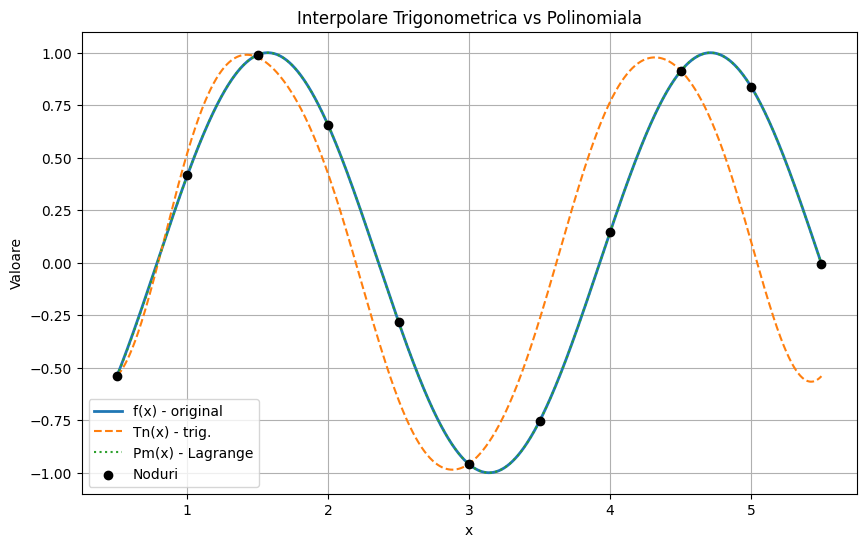

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(X, F_vals, label="f(x) - original", linewidth=2)
plt.plot(X, Tn_vals, label="Tn(x) - trig.", linestyle='--')
plt.plot(X, Pm_vals, label="Pm(x) - Lagrange", linestyle=':')
plt.scatter(x_nodes, y_nodes, color='black', label='Noduri', zorder=5)
plt.title("Interpolare Trigonometrica vs Polinomiala")
plt.xlabel("x")
plt.ylabel("Valoare")
plt.legend()
plt.grid(True)
plt.show()